# モデルの保存と呼び出しのテスト

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## scikit-learnの場合

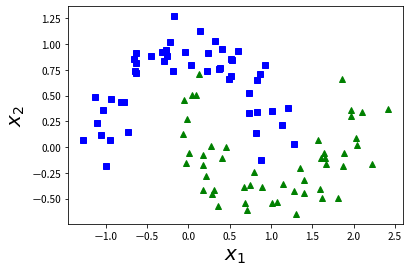

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.show()

In [3]:
# 決定境界を描画する
def plot_predictions(clf, axes):
    # axes : list of [xmin,xmax,ymin,ymax]
    #  メッシュを生成
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    # メッシュの予測
    y_pred = clf.predict(X).reshape(x0.shape)
    # SVC.decision_function() : 分離超平面からの符号付き距離を返す 
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # 分類結果ごとに塗り分け
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

###  モデルの保存

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


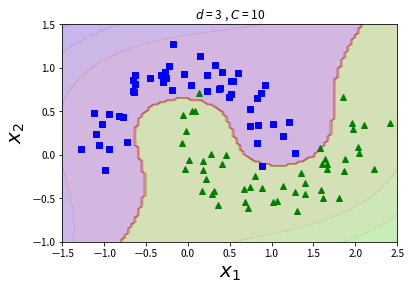

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle # モデルを保存するためのライブラリ

d = 3
C = 10

model = Pipeline([
    # 処理名とオブジェクトのタプルを記述する
    ("poly_features",PolynomialFeatures(degree=d)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=C,loss="hinge"))
])
model.fit(X,y)

# モデルの保存
with open('model.pickle', mode='wb') as f:
    pickle.dump(model,f,protocol=2)
    
plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$d$ = "+str(d)+" , $C$ = "+str(C))
plt.show()

### モデル呼び出し

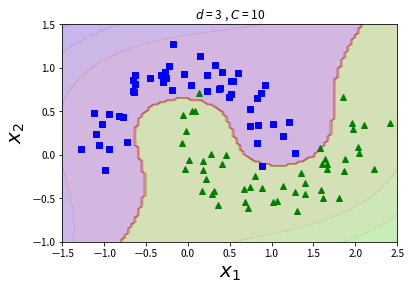

In [5]:
# モデルのオープン
with open('model.pickle', mode='rb') as f:
    clf = pickle.load(f)
    
    plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$d$ = "+str(d)+" , $C$ = "+str(C))
plt.show()

## Tensorflowの場合

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
def get_model():
    # Create a simple model.
    inputs = keras.Input(shape=(32,))
    outputs = keras.layers.Dense(1)(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


model = get_model()

# Train the model.
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))
model.fit(test_input, test_target)

# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model")

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_input, test_target)

4/4 [==============================] - 1s 1ms/step - loss: 0.2305
INFO:tensorflow:Assets written to: my_model\assets
4/4 [==============================] - 0s 2ms/step - loss: 0.2117
